In [195]:
import pandas as pd
df= pd.read_csv("MLdata.csv")




In [184]:
def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to both columns
df = drop_outliers_iqr(df, 'MPG')
df = drop_outliers_iqr(df, 'Distance')


In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Drop any rows with missing values in key columns
df = df.dropna(subset=['MPG'])

# Features and target
X = df.drop(columns=['MPG'])
y = df['MPG']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns unchanged
)

# Pipeline with linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
#print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


R²: 0.7097
MSE: 35.41
MAE: 4.65


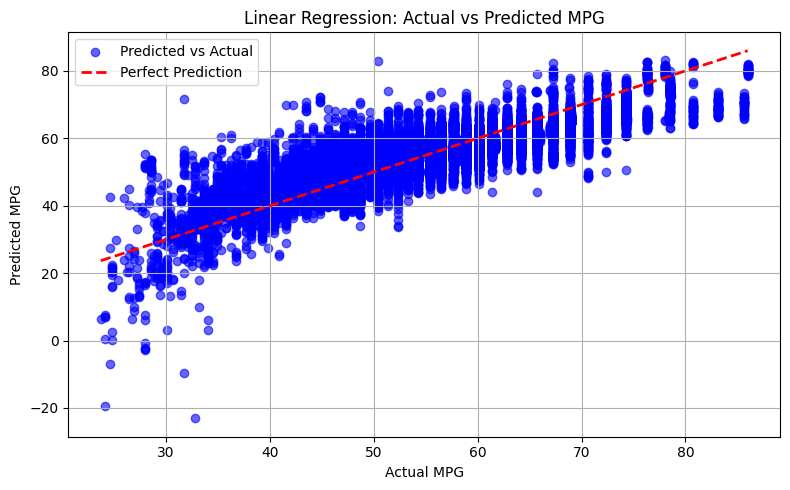

In [186]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Linear Regression: Actual vs Predicted MPG')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [156]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers
network = models.Sequential()
network.add(layers.Input(shape=(13,)))
network.add(layers.Dense(24, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [165]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1. Drop rows with missing target
df = df.dropna(subset=['MPG'])

# 2. Split features and target
X = df.drop(columns=['MPG'])
y = df['MPG'].values

# 3. Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# 4. Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# 5. Fit and transform
X_processed = preprocessor.fit_transform(X)

# 6. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# 7. Build ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output for regression
])

# 8. Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 9. Train with early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# 10. Evaluate
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")

# Optional: Predict
y_pred = model.predict(X_test)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


930/930 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 886.9006 - mae: 22.1362 - val_loss: 62.9716 - val_mae: 6.1520
Epoch 2/100
930/930 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 111.6656 - mae: 8.2851 - val_loss: 55.0209 - val_mae: 5.7457
Epoch 3/100
930/930 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 101.8539 - mae: 7.9017 - val_loss: 53.0709 - val_mae: 5.6658
Epoch 4/100
930/930 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 99.1321 - mae: 7.7980 - val_loss: 51.5034 - val_mae: 5.5554
Epoch 5/100
930/930 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 95.9173 - mae: 7.6794 - val_loss: 52.1890 - val_mae: 5.5975
Epoch 6/100
930/930 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 94.7508 - mae: 7.6309 - val_loss: 51.3258 - val_mae: 5.5935
Epoch 7/100
930/930 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 91.4698 - mae: 7.4999 - val_loss: 49.5475 - val_mae: 5.4726
Epoch 8/100
930/930 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 89.1226 - mae: 7.3934 - val_loss: 49.4257 - val_mae: 5.4685
Epoch 9/100
930/930 ━━━━━━━━━━━━━━━━━━━━

First 5 predicted MPG values:
[58.28935881 56.06150003 50.59102208 62.26653613 62.1369166 ]


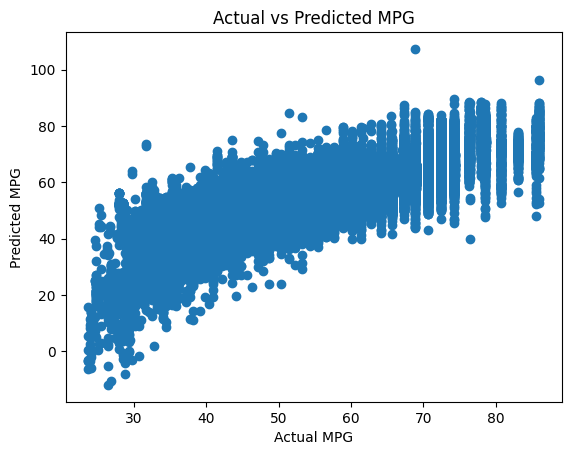

In [193]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Your dataframe (replace this with your actual df)
# df = pd.read_csv('your_data.csv')

features = ['Details', 'Product', 'Distance', 'price', 'transmission', 'engineSize']
target = 'MPG'

X = df[features]
y = df[target]

# Categorical and numeric columns
categorical_cols = ['Details', 'Product', 'transmission']
numeric_cols = ['Distance', 'price', 'engineSize']

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ColumnTransformer to handle categorical encoding + passthrough numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # numeric columns passed as-is
)

# Pipeline with preprocessing, polynomial features, and linear regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X, y)

# Predict MPG for the training data (or new data)
y_pred = pipeline.predict(X)

print("First 5 predicted MPG values:")
print(y_pred[:5])
#plot
import matplotlib.pyplot as plt
plt.scatter(y, y_pred)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()
#make a column called predicted value
df['predicted MPG'] = y_pred